In [99]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

In [120]:
test_prompt_id = 7
data_path = f'outputs/DVRL_DomainAdaptation{test_prompt_id}_devsize30/'

## MLP

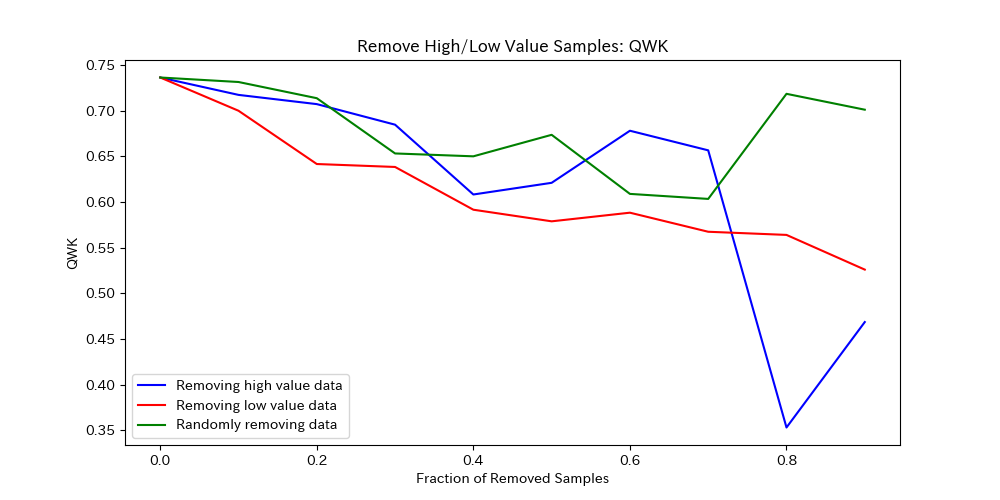

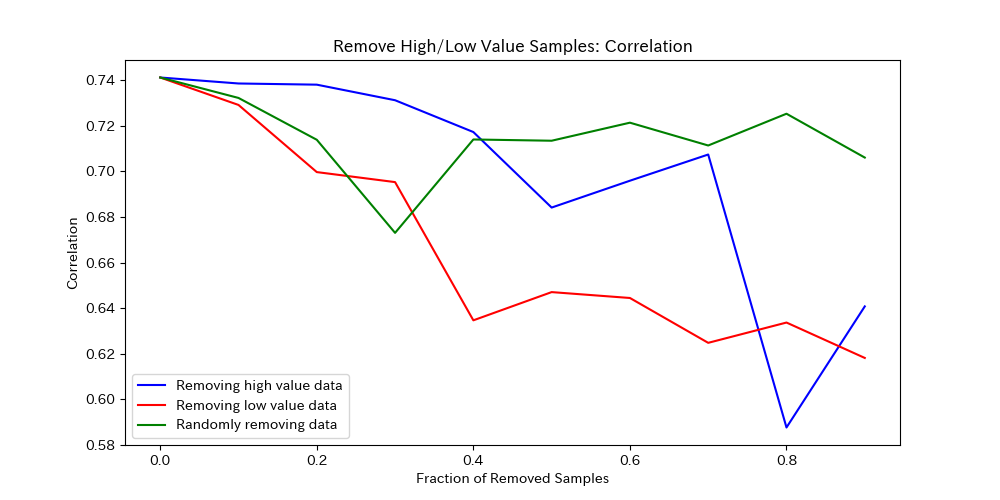

In [121]:
from IPython.display import Image, display

# Display the PNG image
image_path = data_path + 'remove_high_low_samples_qwk.png'
display(Image(filename=image_path))

image_path = data_path + 'remove_high_low_samples_corr.png'
display(Image(filename=image_path))

In [122]:
summary_df = pd.read_csv(data_path + 'metrics_summary.csv')
summary_df

,Metric,Value
0,QWK-high,0.736301
1,Correlation-high,0.741163
2,QWK-low,0.638308
3,Correlation-low,0.695281


## Only dev

In [123]:
only_dev_df = pd.read_csv(data_path + f'BERT-onlydev{test_prompt_id}.csv')
only_dev_df

,qwk,lwk,corr,rmse,mae
0,0.658487,0.436402,0.679644,0.138332,0.108195


## BERT

In [124]:
BERT_df = pd.read_csv(data_path + 'DVRL-BERT.csv')
BERT_df

,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9
0,0.508093,0.572990,0.665009,0.596728,0.542806,0.613014,0.596745,0.539110,0.602535,0.579348
1,0.697518,0.685811,0.710373,0.680570,0.617135,0.680073,0.669260,0.562385,0.651742,0.617943
2,0.029566,0.019708,0.017933,0.017765,0.021794,0.019765,0.021351,0.021807,0.021560,0.030672


In [125]:
min_index = BERT_df.iloc[2, :].values.argmin()
qwk = BERT_df.iloc[0, :].values[min_index]
corr = BERT_df.iloc[1, :].values[min_index]
print(f'QWK: {qwk}, Corr: {corr}')

QWK: 0.5967283564168993, Corr: 0.6805695482898882


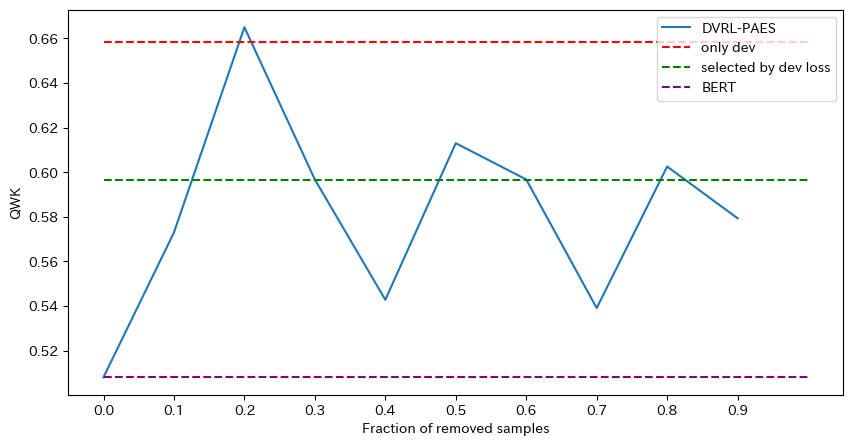

In [126]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1.0, 0.1), BERT_df.iloc[0, :], label='DVRL-PAES')
plt.hlines(only_dev_df.iloc[0, 0], 0, 1, label='only dev', linestyles='dashed', color='red')
plt.hlines(qwk, 0, 1, label='selected by dev loss', linestyles='dashed', color='green')
plt.hlines(BERT_df.iloc[0, :].values[0], 0, 1, label='BERT', linestyles='dashed', color='purple')
plt.xticks(np.arange(0, 1.0, 0.1))
plt.xlabel('Fraction of removed samples')
plt.ylabel('QWK')
plt.legend()
plt.show()

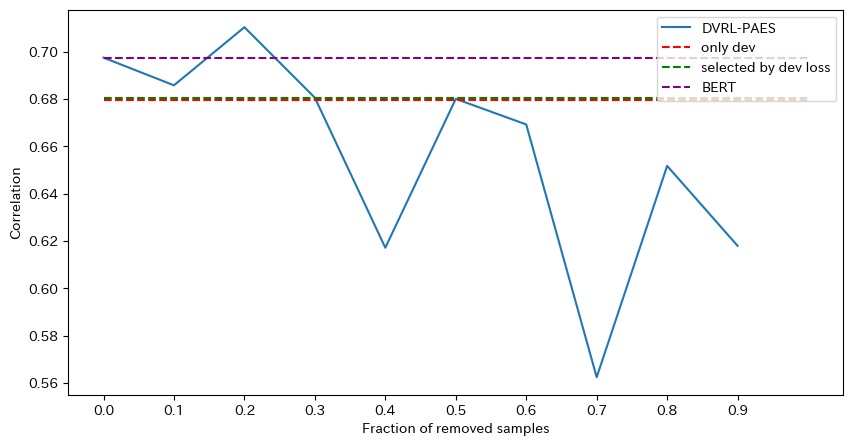

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1.0, 0.1), BERT_df.iloc[1, :], label='DVRL-PAES')
plt.hlines(only_dev_df.iloc[0, 2], 0, 1, label='only dev', linestyles='dashed', color='red')
plt.hlines(corr, 0, 1, label='selected by dev loss', linestyles='dashed', color='green')
plt.hlines(BERT_df.iloc[1, :].values[0], 0, 1, label='BERT', linestyles='dashed', color='purple')
plt.xticks(np.arange(0, 1.0, 0.1))
plt.xlabel('Fraction of removed samples')
plt.ylabel('Correlation')
plt.legend()
plt.show()

## PAES

In [108]:
PAES_df = pd.read_csv(data_path + 'DVRL-PAES.csv')
PAES_df

,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9
0,0.580535,0.548363,0.475495,0.489940,0.533886,0.495537,0.463617,0.424127,0.443922,0.485788
1,0.635853,0.644056,0.637217,0.647430,0.622326,0.592925,0.533079,0.523067,0.582768,0.583837
2,0.008141,0.005850,0.005459,0.005354,0.004654,0.004993,0.004152,0.005182,0.004920,0.005500


In [109]:
min_index = PAES_df.iloc[2, :].values.argmin()
qwk = PAES_df.iloc[0, :].values[min_index]
corr = PAES_df.iloc[1, :].values[min_index]
print(f'QWK: {qwk}, Corr: {corr}')

QWK: 0.4636168218841333, Corr: 0.5330786481417904


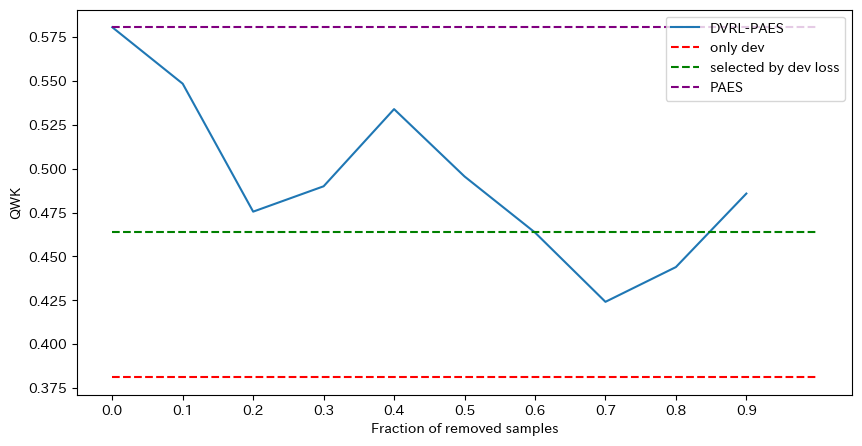

In [110]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1.0, 0.1), PAES_df.iloc[0, :], label='DVRL-PAES')
plt.hlines(only_dev_df.iloc[0, 0], 0, 1, label='only dev', linestyles='dashed', color='red')
plt.hlines(qwk, 0, 1, label='selected by dev loss', linestyles='dashed', color='green')
plt.hlines(PAES_df.iloc[0, :].values[0], 0, 1, label='PAES', linestyles='dashed', color='purple')
plt.xticks(np.arange(0, 1.0, 0.1))
plt.xlabel('Fraction of removed samples')
plt.ylabel('QWK')
plt.legend()
plt.show()

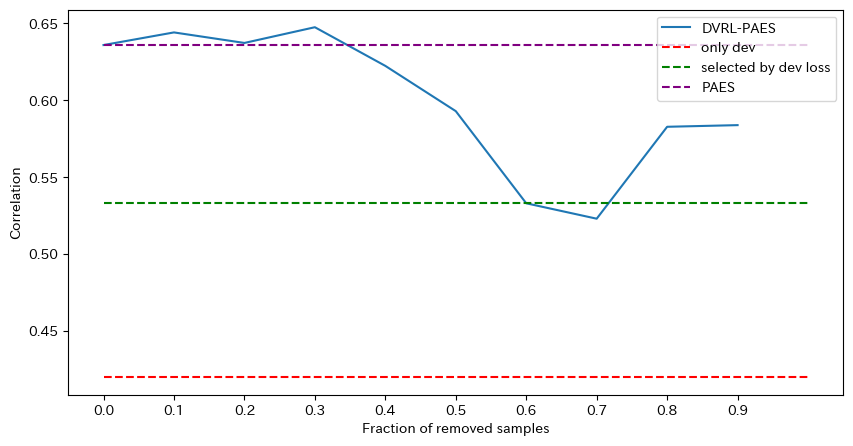

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1.0, 0.1), PAES_df.iloc[1, :], label='DVRL-PAES')
plt.hlines(only_dev_df.iloc[0, 2], 0, 1, label='only dev', linestyles='dashed', color='red')
plt.hlines(corr, 0, 1, label='selected by dev loss', linestyles='dashed', color='green')
plt.hlines(PAES_df.iloc[1, :].values[0], 0, 1, label='PAES', linestyles='dashed', color='purple')
plt.xticks(np.arange(0, 1.0, 0.1))
plt.xlabel('Fraction of removed samples')
plt.ylabel('Correlation')
plt.legend()
plt.show()